### Ques 1) How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.

In [ ]:
Let A = [[a11, a12, ..... a1k],
         [a21, a22, ..... a2k], 
         ...................., 
        
         [an1, an2, ..... ank]]n*k

    B = [[b11, b12, ..... b1m], 
         [b21, b22, ..... b2m], 
         .....................,
        
         [bk1, bk2, ..... bkm]]k*m
    
    
    C = A*B
      = [[a11*b11 + a12*b21 + ... + a1k*bk1 , a11*b12 + a12*b22 + ... + a1k*bk2 ,..... a11*b1m + a12*b2m + ... + a1k*bkm],
         [a21*b11 + a22*b21 + ... + a2k*bk1 , a21*b12 + a22*b22 + ... + a2k*bk2 ,..... a21*b1m + a22*b2m + ... + a2k*bkm],
         ................................................................................................................,
        
         [an1*b11 + an2*b21 + ... + ank*bk1 , an1*b12 + an2*b22 + ... + ank*bk2 ,..... an1*b1m + an2*b2m + ... + ank*bkm]]n*m
        
        
        
     For C11 = a11*b11 + a12*b21 + ... + a1k*bk1
         C12 = a11*b12 + a12*b22 + ... + a1k*bk2
         C1m = a11*b1m + a12*b2m + ... + a1k*bkm
            
         C11 = Multiplication : K and Addition : (K-1) same for C12 and C1m
    
    Then, for 1st row 'm' columns are present so Multiplication : "(K*M)" and Addition : "((K-1)*M)"
          for n rows :- Multiplication : "(N*K*M)" and Addition : "N*M*(K-1)" are present.
          
                

### Ques 2) Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?

In [20]:
import time
import numpy as np

# matrix A and B
# A = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
# B = [[9, 8, 7], [6, 5, 4], [3, 2, 1]]

A=[[1]]
B=[[2]]

# function for the matrix multiplication
def multiply_fuc(A, B):
    n = len(A)
    k = len(A[0])
    m = len(B[0])
    
#     initialize the resultant matrix with 0 value's
    C = [[0 for _ in range(m)] for _ in range(n)]
    
#     multiplying matrix
    for i in range(n):
        for j in range(m):
            for r in range(k):
                C[i][j]+=A[i][r]*B[r][j]
     
    return C


#calculating the time 
start_time = time.perf_counter()

# calculating the C matrix
C = multiply_fuc(A, B)

end_time = time.perf_counter()

list_time = end_time - start_time

print("Result using list of lists")
for row in C:
    print(row)

print(f"Time used for multiplication in List of list : {list_time} second\n")
      

# calculating the matrix mulptiplication using numpy
A_np = np.array(A)
B_np = np.array(B)
      
#measure the time for numpy multiplication
np_start = time.perf_counter()
C_np = np.dot(A_np, B_np)
np_end = time.perf_counter()
      
np_time = np_end - np_start
      
print("Result using numpy")
print(C_np)
print(f"Time taken in numpy : {np_time} second\n")

Result using list of lists
[2]
Time used for multiplication in List of list : 5.3200000365905e-05 second

Result using numpy
[[2]]
Time taken in numpy : 8.859999979904387e-05 second



In [17]:
import time
import numpy as np

# matrix A and B
A = np.random.rand(500, 100).tolist()
B = np.random.rand(100, 500).tolist()


# function for the matrix multiplication
def multiply_fuc(A, B):
    n = len(A)
    k = len(A[0])
    m = len(B[0])
    
#     initialize the resultant matrix with 0 value's
    C = [[0 for _ in range(m)] for _ in range(n)]
    
#     multiplying matrix
    for i in range(n):
        for j in range(m):
            for r in range(k):
                C[i][j]+=A[i][r]*B[r][j]
     
    return C


#calculating the time 
start_time = time.perf_counter()

# calculating the C matrix
C = multiply_fuc(A, B)

end_time = time.perf_counter()

list_time = end_time - start_time

# print("Result using list of lists")
# for row in C:
#     print(row)

print(f"Time used for multiplication in List of list : {list_time} second\n")
      

# calculating the matrix mulptiplication using numpy
A_np = np.array(A)
B_np = np.array(B)
      
#measure the time for numpy multiplication
np_start = time.perf_counter()
C_np = np.dot(A_np, B_np)
np_end = time.perf_counter()
      
np_time = np_end - np_start
      
# print("Result using numpy")
# print(C_np)
print(f"Time taken in numpy : {np_time} second\n")

Time used for multiplication in List of list : 4.298115999999936 second

Time taken in numpy : 0.00953879999997298 second



## Observation

#### For small matrix list of list is faster and for larger matrix numpy is faster
#### Numpy is written in C and fortran 
#### Numpy store the data in continuous form which help caching and memory efficient


### Ques 3)Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the the array. Using this method, what is the time complexity of finding the median of the array? Can you suggest a better method? Can you implement both these methods in Python and compare against numpy.median routine in terms of time?



In [36]:
import random
import time

A = [random.randint(1, 100) for _ in range(10000)]

def find_median(A):
    n = len(A)
    
#     Copying the original array
    A_copy = A[:]
    
#     function to remove the largest element in the list
    def remove_max_element(arr):
        max_val = arr[0]
        for val in arr:
            if max_val<val : 
                max_val = val
        arr.remove(max_val)
        return max_val

#     find the median element by removing the element
    for _ in range(n//2):
        remove_max_element(A_copy)
    
    if n%2==1:
        return remove_max_element(A_copy)
    else:
        l1 = remove_max_element(A_copy)
        l2 = remove_max_element(A_copy)
        return (l1+l2)/2
        

# measure the time for O(n2) method
start_time = time.perf_counter()
median_val = find_median(A)
end_time = time.perf_counter()

total_time = end_time - start_time
# print(A)
print(f"\nThe median of the list is {median_val} and for calculating this {total_time} by traversing method\n")

def find_median_sorted(A):
    n  = len(A)
    
    if n%2==1 : 
        return A[n//2]
    else :
        l1 = A[n//2]
        l2 = A[n//2+1]
        return (l1+l2)/2

# another method which is O(nlog(n)) with the help of sorting
start_time_sorting = time.perf_counter()

A.sort()
median_val = find_median_sorted(A)
end_time_sorting = time.perf_counter()
time_diff = end_time_sorting- start_time_sorting


print(f"The median is {median_val} and time for calculating is {time_diff} using sorting method")


import numpy as np

np_start = time.perf_counter()
np_median = np.median(A)
np_end = time.perf_counter()

np_time_req = np_end- np_start
print(f"\nThe median of list is {np_median} and time for calculating is {np_time_req} using Numpy mehtod \n")



The median of the list is 50.0 and for calculating this 2.2485935000004247 by traversing method

The median is 50.0 and time for calculating is 0.0019970000012108358 using sorting method

The median of list is 50.0 and time for calculating is 0.0014326999989862088 using Numpy mehtod 



#### Conclusion 
#### By traversing method 
#### T.C - O(n) + O(n-1) + O(n-2) ................O(n//2)
####  T.C - O(n^2)
####  whereas the sorting method is using O(nlog(n)) time

#### Ques 4) What is the gradient of the following function with respect to x and y?

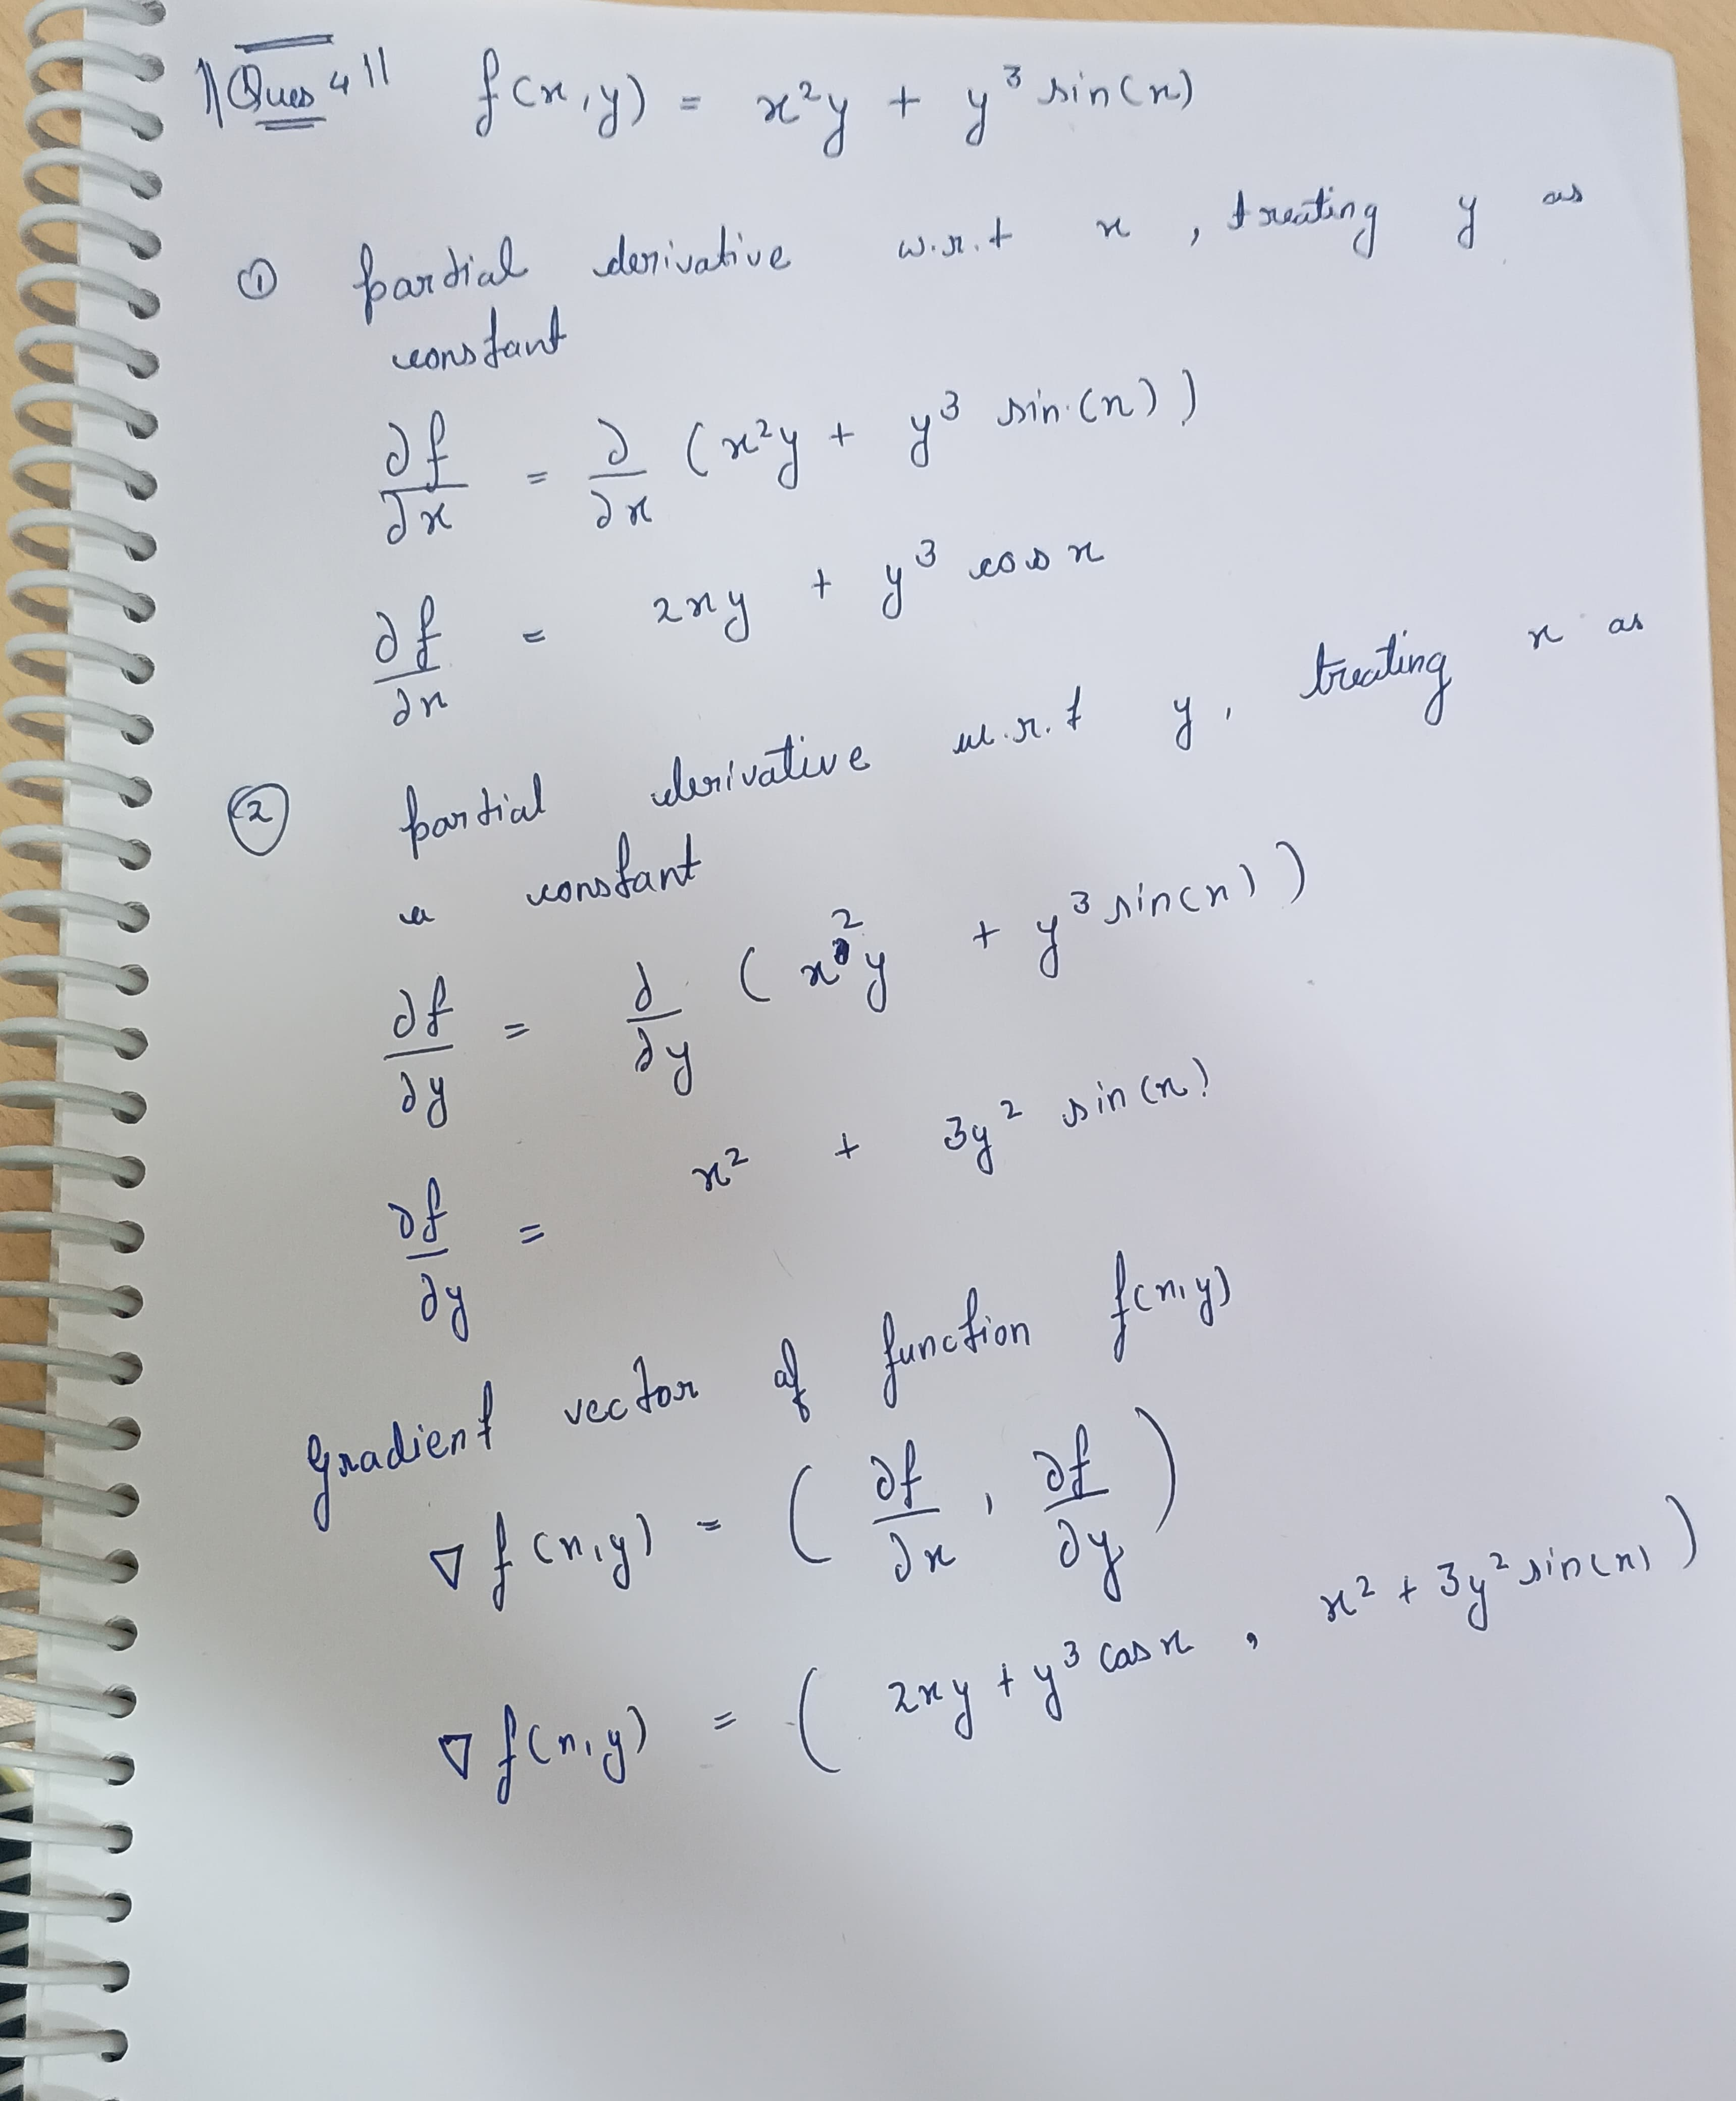

#### Ques 5)Use JAX to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of x and y

JAX is a numerical computing library develop by google that allow you to perform high-performance machine learning. It's particularly know for its ability to automatically differentiative

JAX numpy offer similar functionality but with added benefits of JAX's optimization and transformation

JAX Grad function that computer the gradient of another function with respect to its input


source : Chat gpt 

In [2]:
pip install jax jaxlib

Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.6.0 requires daal==2021.4.0, which is not installed.
numba 0.55.1 requires numpy<1.22,>=1.18, but you have numpy 1.24.4 which is incompatible.


     ---------------------------------------- 2.0/2.0 MB 2.1 MB/s eta 0:00:00
     ---------------------------------------- 51.9/51.9 MB 9.8 MB/s eta 0:00:00
     --------------------------------------- 16.6/16.6 MB 16.4 MB/s eta 0:00:00
     -------------------------------------- 126.7/126.7 kB 7.8 MB/s eta 0:00:00
     --------------------------------------- 14.9/14.9 MB 16.0 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.5
    Uninstalling numpy-1.21.5:
      Successfully uninstalled numpy-1.21.5


In [5]:
# credit :  whole code is from chat gpt

import jax
import jax.numpy as jnp
from jax import grad

# Define the function
def f(x, y):
    return x**2 * y + y**3 * jnp.sin(x)

# Define the gradient functions
grad_x = grad(f, argnums=0)  # Gradient with respect to x
grad_y = grad(f, argnums=1)  # Gradient with respect to y

# Define some random values for x and y
x_val = 2.0
y_val = 3.0

# Compute the gradients
gradient_x = grad_x(x_val, y_val)
gradient_y = grad_y(x_val, y_val)

print(f"Gradient with respect to x at (x={x_val}, y={y_val}): {gradient_x}")
print(f"Gradient with respect to y at (x={x_val}, y={y_val}): {gradient_y}")

# Compute the analytical gradients
analytical_grad_x = 2 * x_val * y_val + y_val**3 * jnp.cos(x_val)
analytical_grad_y = x_val**2 + 3 * y_val**2 * jnp.sin(x_val)

print(f"Analytical gradient with respect to x: {analytical_grad_x}")
print(f"Analytical gradient with respect to y: {analytical_grad_y}")

# Verify if they match
print(f"Match for gradient with respect to x: {jnp.isclose(gradient_x, analytical_grad_x)}")
print(f"Match for gradient with respect to y: {jnp.isclose(gradient_y, analytical_grad_y)}")


Gradient with respect to x at (x=2.0, y=3.0): 0.7640352249145508
Gradient with respect to y at (x=2.0, y=3.0): 28.551029205322266
Analytical gradient with respect to x: 0.7640352249145508
Analytical gradient with respect to y: 28.551029205322266
Match for gradient with respect to x: True
Match for gradient with respect to y: True


#### Ques 6) Use sympy to confirm that you obtain the same gradient analytically.

In [8]:
pip install sympy

Note: you may need to restart the kernel to use updated packages.


In [1]:
#  credit : whole code is from chat gpt

import sympy as sp

# Define the symbols
x, y = sp.symbols('x y')

# Define the function
f = x**2 * y + y**3 * sp.sin(x)

# Compute the partial derivatives
partial_x = sp.diff(f, x)
partial_y = sp.diff(f, y)

# Define some random values for x and y
x_val = 2.0
y_val = 3.0

# Substitute the values into the partial derivatives
partial_x_val = partial_x.subs({x: x_val, y: y_val})
partial_y_val = partial_y.subs({x: x_val, y: y_val})

# Print the results
print(f"Partial derivative with respect to x: {partial_x}")
print(f"Partial derivative with respect to y: {partial_y}")
print(f"Value of partial derivative with respect to x at (x={x_val}, y={y_val}): {partial_x_val}")
print(f"Value of partial derivative with respect to y at (x={x_val}, y={y_val}): {partial_y_val}")

# Compute the analytical gradients
analytical_grad_x = 2 * x_val * y_val + y_val**3 * sp.cos(x_val)
analytical_grad_y = x_val**2 + 3 * y_val**2 * sp.sin(x_val)

print(f"Analytical gradient with respect to x: {analytical_grad_x.evalf()}")
print(f"Analytical gradient with respect to y: {analytical_grad_y.evalf()}")


Partial derivative with respect to x: 2*x*y + y**3*cos(x)
Partial derivative with respect to y: x**2 + 3*y**2*sin(x)
Value of partial derivative with respect to x at (x=2.0, y=3.0): 0.764035413227155
Value of partial derivative with respect to y at (x=2.0, y=3.0): 28.5510305242934
Analytical gradient with respect to x: 0.764035413227155
Analytical gradient with respect to y: 28.5510305242934


#### Ques 7) Create a Python nested dictionary to represent hierarchical information. We want to store record of students and their marks.

In [2]:
student = {
    "2022" :{
        "Branch 1" : {
            "1" : {
                "Name" : "Sam",
                "Marks" :{
                    "Physics" : "100",
                    "Maths" : "100",
                    "Chemistry" : "100"
                }
            },
            "2" :{
                "Name" : "Sreejan"
            }
        },
        "Branch 2" : {
            "1" : {
                "Name" : "Ram"
            }
        }
    },
    "2023" :{
        "Branch 1" : {
            
        }
    }
}

In [3]:
student_data = student["2022"]["Branch 1"]["1"]
print(f"Student name : {student_data['Name']}")

Student name : Sam


#### Ques 9)Using matplotlib plot the following functions on the domain: x = 0.5 to 100.0 in steps of 0.5.

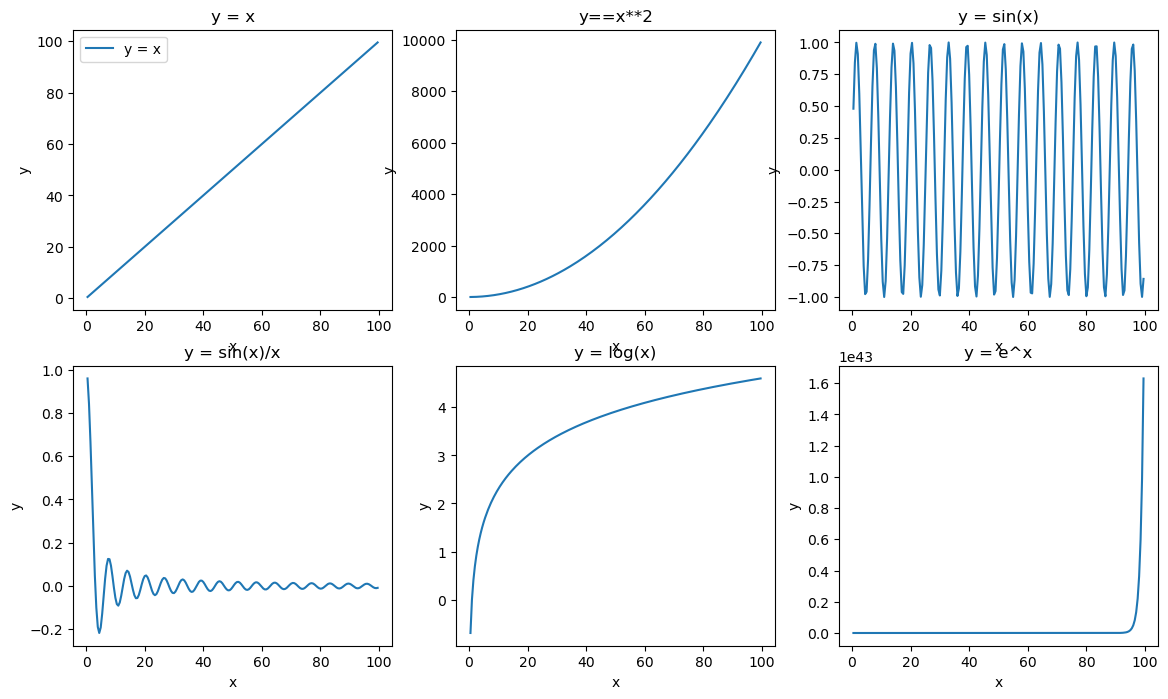

In [28]:
import matplotlib.pyplot as plt
import numpy as np

#define the x values
x = np.arange(0.5, 100.0, 0.5)

#calculate the y values for each function

y1 = x
y2 = x**2
y3 = np.sin(x)
y4 = np.sin(x)/x
y5 = np.log(x)
y6 = np.exp(x)


#create a plot
plt.figure(figsize = (14, 8))

#plot y= x
plt.subplot(2,3,1)
plt.plot(x, y1, label = 'y = x')
plt.title('y = x')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()


#plot y = x**2
plt.subplot(2, 3,2)
plt.plot(x, y2, label = 'y = x**2')
plt.title('y==x**2')
plt.xlabel('x')
plt.ylabel('y')


#plot y  = sin(x)
plt.subplot(2, 3, 3)
plt.plot(x, y3, label = 'y = sin(x)')
plt.title('y = sin(x)')
plt.xlabel('x')
plt.ylabel('y')


#plot y = sin(x)/x
plt.subplot(2, 3, 4)
plt.plot(x, y4, label = 'y = sin(x)/x')
plt.title('y = sin(x)/x')
plt.xlabel('x')
plt.ylabel('y')

#plot y = log(x)
plt.subplot(2, 3, 5)
plt.plot(x, y5, label = 'y = log(x)')
plt.title('y = log(x)')
plt.xlabel('x')
plt.ylabel('y')


#plot y = e^x
plt.subplot(2, 3,6)
plt.plot(x, y6, label = 'y = e^x')
plt.title('y = e^x')
plt.xlabel('x')
plt.ylabel('y')





plt.show()

#### Ques 10 ) Using numpy generate a matrix of size 20X5 containing random numbers drawn uniformly from the range of 1 to 2. Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”. Find the column with the highest standard deviation. Find the row with the lowest mean.




In [19]:
import numpy as np
import pandas as pd

# generate matrix 20x5

matrix = np.random.uniform(1, 2, size = (20, 5))

#create a datafram from the matrix 
df = pd.DataFrame(matrix, columns = ["a", "b", "c", "d", "e"])

# display the matrix
print(matrix)

# printing the data frame
print("Data Frame : ")
print(df)


# finding the column with maximum deviation
std_devs = df.std()
columns_with_highest_std = std_devs.idxmax()
highest_deviation= std_devs.max()


print(f"\nColums with highest standard deviation : {columns_with_highest_std}")
print(f"Highest values of std along column : {highest_deviation}")

# finding the row with minimum mean
row_mean = df.mean(axis=1)
row_with_minimum_mean = row_mean.idxmin()
minimum_val = row_mean.min();

print(f"The minimum mean index for a matrix is : {row_with_minimum_mean}")
print(f"The value of minimum mean is : {minimum_val}")


[[1.61974938 1.44434287 1.45835872 1.38486148 1.07667371]
 [1.5102623  1.12155061 1.51222338 1.25387485 1.6097921 ]
 [1.18553302 1.06740534 1.5485609  1.72379818 1.7201921 ]
 [1.40997694 1.81668793 1.46372186 1.10954141 1.90705722]
 [1.79038106 1.81920688 1.76254719 1.91426708 1.71531291]
 [1.68131795 1.64454222 1.62324905 1.54030465 1.1618929 ]
 [1.47571423 1.36640677 1.2719627  1.82108138 1.04254893]
 [1.89988507 1.44021194 1.81419457 1.10747918 1.7916872 ]
 [1.56724708 1.62156856 1.02782543 1.77017096 1.83681117]
 [1.29268082 1.18975193 1.15528278 1.0602541  1.00894946]
 [1.78724492 1.92083899 1.94660911 1.70795618 1.90856399]
 [1.27991345 1.04392551 1.12026303 1.42942135 1.55877267]
 [1.97306876 1.56712806 1.62715589 1.70872962 1.10903272]
 [1.13615547 1.07472726 1.44512433 1.8162427  1.86841892]
 [1.89084373 1.68917459 1.69587335 1.11840051 1.21380128]
 [1.09033631 1.5321194  1.81983748 1.33332169 1.16164352]
 [1.18886354 1.63564397 1.82364226 1.55969356 1.92833848]
 [1.94386688 1

#### Ques 11) Add a new column to the dataframe called “f” which is the sum of the columns “a”, “b”, “c”, “d”, “e”. Create another column called “g”. The value in the column “g” should be “LT8” if the value in the column “f” is less than 8 and “GT8” otherwise. Find the number of rows in the dataframe where the value in the column “g” is “LT8”. Find the standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” and “GT8” respectively.



In [26]:
# adding the new column f 
df["f"]  = df["a"] + df["b"] + df["c"] + df["d"] + df["e"]

# create a col 'g' with LT8 and GT8
df["g"] = np.where(df["f"]<8, "LT8", "GT8")

# finding the number of rows where the value in g is LT8
count_lt8 = df[df["g"]=='LT8'].shape[0]


# finding the standard deviation for LT8 and GT8 

std_lt8 = df[df["g"]=='LT8']["f"].std()
std_gt8 = df[df["g"]=='GT8']["f"].std()


print(f"The number of rows where the value of 'G' is LT8 : {count_lt8}")
print(f"The std of col g where value is LT8 : {std_lt8}")
print(f"The std of col g where value is GT8 : {std_gt8}")



The number of rows where the value of 'G' is LT8 : 14
The std of col g where value is LT8 : 0.6039859261983666
The std of col g where value is GT8 : 0.5414060721942571


#### Ploting the y = x^3/100

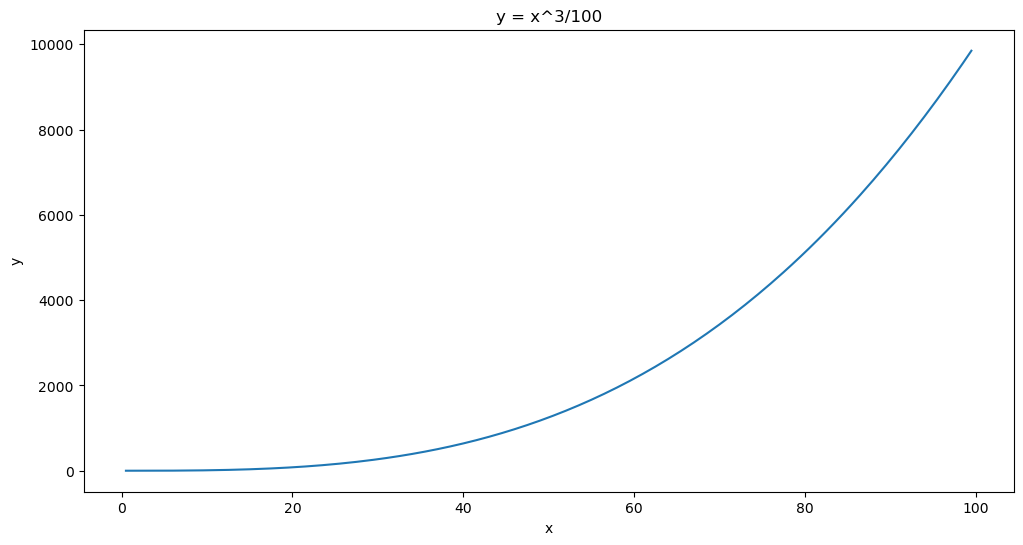

In [32]:
plt.figure(figsize=(12, 6))
y7 = x**3/100

plt.plot(x, y7, label = 'y = x^3/100')
plt.title("y = x^3/100")
plt.xlabel('x')
plt.ylabel('y')

plt.show()


#### Ques 11) Write a small piece of code to explain broadcasting in numpy


In [41]:
# Broadcasting is a powerful feature in Numpy that allow
# operation to be performed on array of different shapes
# the smaller array is "broadcast" across the larger array
# so that they have compatible shapes

# Advantage : This eliminates the need for explicit 
# replication of data, making the code more efficient and 
# concise
 
# from Chat GPT4



matrix1 =np.random.uniform(1, 3, size=(3, 3))
print(matrix1)

vector = np.array([1, 0, -1])

result  = matrix1 + vector

print("Matrix : ")
print(matrix1)

print("\nVector")
print(vector)

print("\nResult of Broadcasting (matrix + vector)")
print(result)




[[2.70670788 2.95962301 1.74871737]
 [2.11993635 2.45291904 2.24683874]
 [2.66314049 2.3190313  1.74496547]]
Matrix : 
[[2.70670788 2.95962301 1.74871737]
 [2.11993635 2.45291904 2.24683874]
 [2.66314049 2.3190313  1.74496547]]

Vector
[ 1  0 -1]

Result of Broadcasting (matrix + vector)
[[3.70670788 2.95962301 0.74871737]
 [3.11993635 2.45291904 1.24683874]
 [3.66314049 2.3190313  0.74496547]]


#### Ques 13) Write a function to compute the argmin of a numpy array. The function should take a numpy array as input and return the index of the minimum element. You can use the np.argmin function to verify your solution.

In [46]:
# generating the array 

array = np.random.randint(0, 101,size = 50)


print(array)

# find the minimum value
curr = array[0];
ind = 0;
for i in range(50):
    if curr>array[i]:
        curr = array[i]
        ind = i

        
min_value_idx = np.argmin(array)

print(f"Minimum value of array is : {curr}")
print(f"Index got by traversing method is : {ind}")
print(f"Index got by using Argmin function : {min_value_idx}")

[ 35  14   9  31  82  34  88   6  69  15   1  56  82  53   9  16  41  61
  73  66  79  60  51  14  66  53  65  85  19  60  73  18  51  32  85  94
  96  29  11  71  79 100  58 100  36  69  40  72  52  85]
Minimum value of array is : 1
Index got by traversing method is : 10
Index got by using Argmin function : 10
